<a href="https://colab.research.google.com/github/christianlozano99/ChristianLozano/blob/master/KNN_WineQualityPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Christian Lozano Assigment 2 Spring 2021**


### **Load in data from CSV Files**


*   Load CSV file sfor testing and training
*   Import some basic libraies such as pandas and numpy



**Fufilled Requiments on this cell:**
1. You must load the data from provided CSV files

In [ ]:
import numpy as np 
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import decomposition


testDF = pd.read_csv('test.csv')
trainDF = pd.read_csv('train.csv')
trainDF

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,0
1,1,11.5,0.18,0.51,4.0,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,1
2,2,8.2,0.34,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,1
3,3,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,0
4,4,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,794,6.6,0.96,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,1
795,795,7.5,0.58,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,1
796,796,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,1
797,797,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,1


### **Preprocessing Data**
Dropping id column from the test data and training data and looking to see if theres any missing data segments. Since it return 0 for both sets of the test data frame and the training one we have no missing values.

**Fufilled Requiments on this cell:**
2. You must check for missing values within the training data.
3. If the training data contains missing values, you must describe and implement an approach to handle those missing values.

In [ ]:
trainDF = trainDF.drop('id', axis = 1)
testDF = testDF.drop('id', axis = 1)
testDF = testDF.drop('residual sugar', axis =1)
testDF = testDF.drop('fixed acidity', axis =1)

print(trainDF.isnull().sum().sum())
print(testDF.isnull().sum().sum())

0
0


**Outliers**

Here I looked at the box plots generated by the columns that seemed to have heavy outliers are residual sugar and fixed acidity. 

**Fufilled Requiments on this cell:**
4. You must check for outliers within the training data.

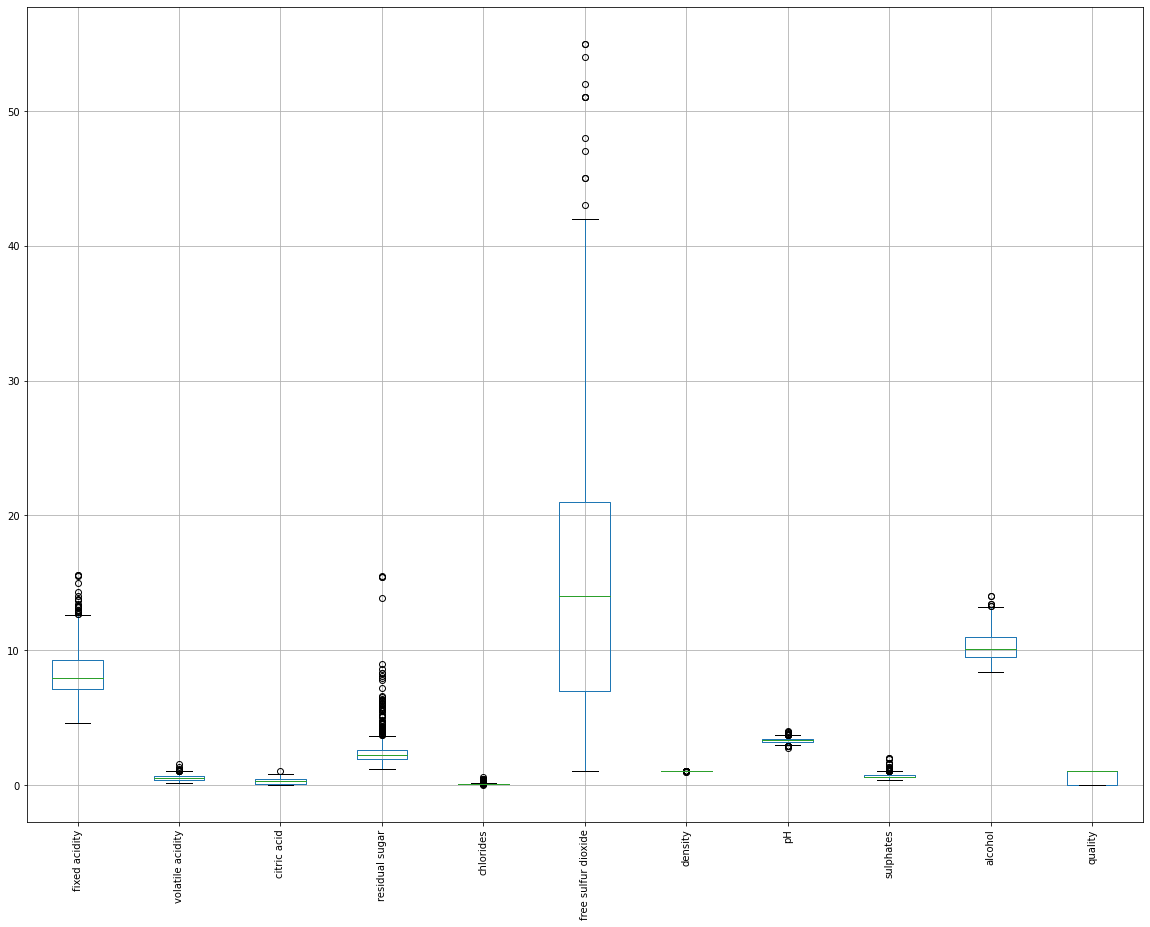

In [ ]:
trainDF.loc[:, trainDF.columns[trainDF.max()<=100].to_list()].boxplot(figsize=(20,15),rot =90)

Assigning the training values, X_train for the parameters and y_train for the target vector. and then preproccessing the training data to be scaled. Also I set it the standard scaler because KNN is senestive to outliers, so scaling it will put in a certain range that won't mess up the whole model. Along with this I dropped the two columns that had a heavy amount of outliers on the training set.

**Fufilled Requiments on this cell:**
5. If the training data contains outliers, you must describe and implement an approach to handle those outliers.
6. You must determine whether or not you will implement normalization or standardization, and explain your decision.

In [ ]:
y = trainDF['quality']
X = trainDF.drop('quality',axis = 1)
X = X.drop('residual sugar',axis = 1)
X = X.drop('fixed acidity', axis =1)

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify = y )

X_train = preprocessing.scale(X_train)
X_train = sc.fit_transform(X_train)

###**K- nearest neighbors modeling**
Training the KNN machine learning algorithm and checkign what the f1, accuracy and ROC AUC scores are.

**Fufilled Requiments on this cell:**
7. You must build and train a k-nearest neighbors model on the training data.
8. You must report the best ROC AUC score, F1 score, and accuracy score that you were able to obtain form your model.

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 26, weights = 'distance', algorithm='kd_tree',leaf_size = 1)
neigh.fit(X_train, y_train)

y_predict = neigh.predict(X_test)

print('F1_Score:',f1_score(y_test, y_predict), '\nAccuracy Score:',accuracy_score(y_test,y_predict), '\nROC_AUC Score: ',roc_auc_score(y_test,y_predict))

F1_Score: 0.8255813953488372 
Accuracy Score: 0.8125 
ROC_AUC Score:  0.8114393463230672


###**Searching for hyperparameters**
I used a for loop to get the f1 scores of diffrent k neightbors to see which would give me the highest score in general. Of course from this graph I decduced that 12 is the best.

     n        f1
0    1  0.756964
1    2  0.756964
2    3  0.762369
3    4  0.760258
4    5  0.772014
5    6  0.774458
6    7  0.784814
7    8  0.776992
8    9  0.788106
9   10  0.789025
10  11  0.782494
11  12  0.790165
12  13  0.787897
13  14  0.792905
14  15  0.784647
15  16  0.781183
16  17  0.786963
17  18  0.792926
18  19  0.787974
19  20  0.790607
20  21  0.796658
21  22  0.798959
22  23  0.799339
23  24  0.797898
24  25  0.799444
25  26  0.803538
26  27  0.803180
27  28  0.800893
28  29  0.800471


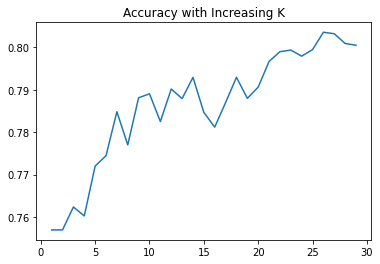

In [ ]:
results = []

for n in range(1, 30):
   pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=n, weights='distance', algorithm='kd_tree',leaf_size = 1))
   c_val = cross_val_score(pipe, X, y, cv=5, scoring='f1').mean()
   results.append([n, c_val])

results = pd.DataFrame(results, columns=["n", "f1"])

print(results)
plt.plot(results.n, results.f1)
plt.title("Accuracy with Increasing K")
plt.show()


Further validating my use of 26 neighbors I found out with gridsearch that it is the best value, with a f1 of .803538

In [ ]:
params_dt = {'n_neighbors': [25,26],
             'weights':['uniform','distance'],
             'leaf_size':[1,2,3]
             }
grid_dt = GridSearchCV(estimator=neigh,param_grid = params_dt, scoring = 'f1', cv = 5, n_jobs = -1 )
grid_dt.fit(X_train, y_train)


best_hyperparams = grid_dt.best_estimator_
print('Best Hyperparams:', best_hyperparams)

best_hyperparams = grid_dt.best_score_
print('Best Score:', best_hyperparams)


Best Hyperparams: KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='distance')
Best Score: 0.7965245227314193


###**Predicting the target vector**
preproccessing to scale what I am going to make my estimation of and then predicting what will be the output of the test file.

**Fufilled Requiments on this cell:**
9. You must predict the target vector for the test data (from test.csv) using your model.
10. Your notebook must be saved with the output enabled so that we can see the results of each cell after it has been run.

In [ ]:
testDF = preprocessing.scale(testDF)
y_predict = neigh.predict(testDF)

submission = pd.DataFrame({"quality": y_predict})
submission.to_csv('submission.csv', index =True, index_label = 'id')